   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 22.4 MB/s eta 0:00:00


Downloading...
From: https://drive.google.com/uc?export=download&id=1Mafu1sTobziya-n-MFCJeR8QftigKhDG
To: /content/Sampledata_5A.zip
100%|██████████| 5.45M/5.45M [00:00<00:00, 92.9MB/s]


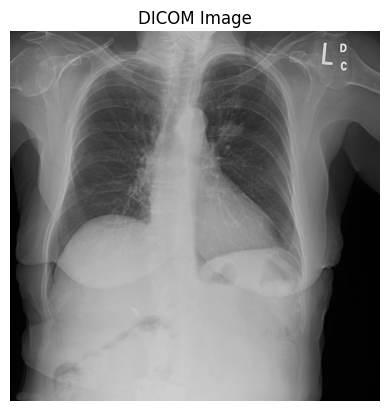

Manufacturer Model Name: Revolution XQi ADS_28.2
Patient Name: 

--- Access via Tag Numbers ---
Patient Name (Tag): (0010,0010) Patient's Name                      PN: ''


In [ ]:
# Install required libraries
!pip install pydicom matplotlib gdown -q

# Import libraries
import pydicom as dicom
import matplotlib.pyplot as plt
import gdown
import os
import zipfile

# Downloading the zip archive containing sample images
if not os.path.isdir("Sampledata_5A"):
    url = "https://drive.google.com/uc?export=download&id=1Mafu1sTobziya-n-MFCJeR8QftigKhDG"
    output = "Sampledata_5A.zip"
    gdown.download(url, output, quiet=False)

    # Unzip the downloaded dataset
    with zipfile.ZipFile(output, "r") as zip_ref:
        zip_ref.extractall()

    # Remove the zip file
    os.remove(output)

# Specify your DICOM image path
image_path = "Sampledata_5A/Sample5_1.dcm"

# Load the DICOM file
ds = dicom.dcmread(image_path)

# Display the image
plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
plt.title("DICOM Image")
plt.axis("off")
plt.show()

# Viewing metadata fields
print("Manufacturer Model Name:", getattr(ds, "ManufacturerModelName", "N/A"))
print("Patient Name:", getattr(ds, "PatientName", "N/A"))

# Alternative access using tag numbers
print("\n--- Access via Tag Numbers ---")
print("Patient Name (Tag):", ds.get((0x10, 0x10), "Not Found"))


Saving converted_5_files.zip to converted_5_files (1).zip
Extracted DICOM files to folder: dicom_files
Files: ['26 (19).jpg.dcm', '26 (21).jpg.dcm', '26 (20).jpg.dcm', '26 (22).jpg.dcm', '26 (23).jpg.dcm']
Reading DICOM file: dicom_files/26 (19).jpg.dcm


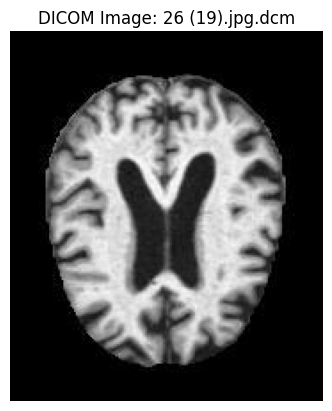

Manufacturer Model Name: N/A
Patient Name: N/A

--- Access via Tag Numbers ---
Patient Name tag not found


In [ ]:
# Install required libraries
!pip install pydicom matplotlib -q

# Import libraries
import pydicom as dicom
import matplotlib.pyplot as plt
import os
import zipfile
from google.colab import files

# --- Step 1: Upload your converted DICOM ZIP ---
uploaded = files.upload()  # Select converted_5_files.zip

# --- Step 2: Unzip the uploaded file ---
zip_path = list(uploaded.keys())[0]  # Get the uploaded filename
extract_folder = "dicom_files"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"Extracted DICOM files to folder: {extract_folder}")
print("Files:", os.listdir(extract_folder))

# --- Step 3: Read and display one DICOM image (first file) ---
dicom_files = [f for f in os.listdir(extract_folder) if f.lower().endswith(".dcm")]

if not dicom_files:
    raise FileNotFoundError("No DICOM files found!")

image_path = os.path.join(extract_folder, dicom_files[0])
print(f"Reading DICOM file: {image_path}")

# Read DICOM
ds = dicom.dcmread(image_path)

# Display the image
plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
plt.title(f"DICOM Image: {dicom_files[0]}")
plt.axis("off")
plt.show()

# View metadata
print("Manufacturer Model Name:", getattr(ds, "ManufacturerModelName", "N/A"))
print("Patient Name:", getattr(ds, "PatientName", "N/A"))

# Access via tag numbers
print("\n--- Access via Tag Numbers ---")
print(ds.get((0x0010, 0x0010), "Patient Name tag not found"))
